In [1]:
import xara
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ExoRIM as exo
%matplotlib inline

In [2]:
[file for file in os.listdir(xara.__path__[0]) if "txt" in file]

['golay9.txt',
 'palomar_med_cross.txt',
 'hst.txt',
 'subaru_asym.txt',
 'tmt.txt']

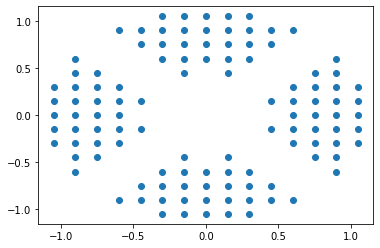

In [3]:
hst_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "hst.txt"))
plt.scatter(hst_virtual_aperture[:, 0], hst_virtual_aperture[:, 1])

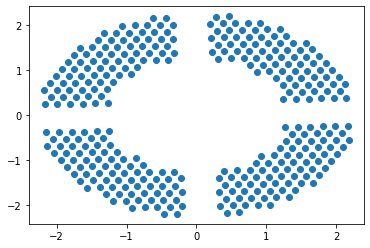

In [4]:
palomar_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "palomar_med_cross.txt"))
plt.scatter(palomar_virtual_aperture[:, 0], palomar_virtual_aperture[:, 1])

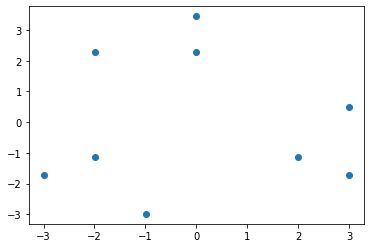

In [5]:
golay_mask = np.loadtxt(os.path.join(xara.__path__[0], "golay9.txt"))
plt.scatter(golay_mask[:, 0], golay_mask[:, 1])

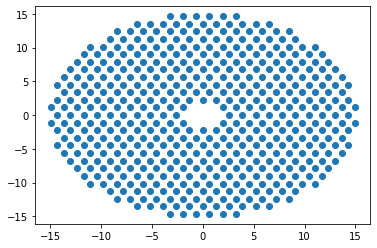

In [6]:
#thirty meter telescope
tmt_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "tmt.txt"))
plt.scatter(tmt_virtual_aperture[:, 0], tmt_virtual_aperture[:, 1])

In [7]:
cwavel = 0.5e-6 # Wavelength [m]
ISZ = 128# Array size (number of pixel on a side)
pscale = 0.1 # plate scale [mas/pixel]
m2pix = xara.core.mas2rad(pscale) * ISZ / cwavel  # [1/m] units for (u, v) Fourier space
m2pix

0.12411230236404125

In [8]:
kpi = xara.KPI(array=golay_mask)

Attempting to build KPI from array None
36 distinct baselines were identified
10 first singular values for this array:
[3. 3. 3. 3. 3. 3. 3. 1.]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -   9 sub-apertures
        -  36 distinct baselines
        -  28 Ker-phases (77.8 % target phase information recovery)
        -   8 Eig-phases (88.9 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


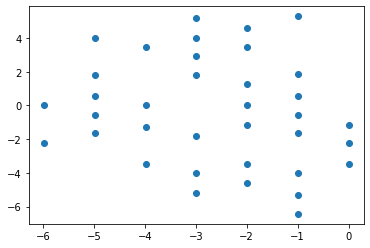

In [9]:
plt.scatter(kpi.UVC[:, 0], kpi.UVC[:, 1])

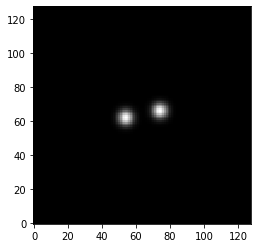

In [10]:
image_coords = np.arange(128) - 128 / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image = np.zeros_like(xx)
rho_squared = (xx - 10) ** 2 + (yy-2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
rho_squared = (xx + 10) ** 2 + (yy+2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
plt.imshow(image, cmap="gray")

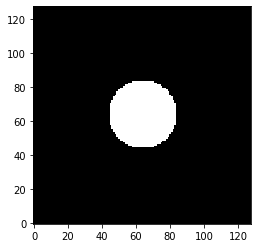

In [11]:
image_coords = np.arange(128) - 128 / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image2 = np.zeros_like(xx)
rho_squared = (xx) ** 2 + (yy) ** 2
image2 += rho_squared**(1/2) < 20
plt.imshow(image2, cmap="gray")

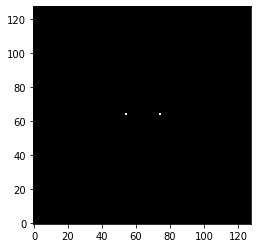

In [12]:
image3 = np.zeros_like(image)
rho1 = (xx - 10)**2 + (yy)**2
image3 += rho1 < 1
rho1 = (xx + 10)**2 + (yy)**2
image3 += rho1 < 1
plt.imshow(image3, cmap="gray")

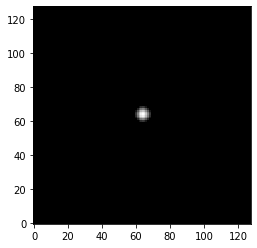

In [13]:
image4 = np.zeros_like(image)
rho =np.sqrt(rho_squared)
alpha = 10 # pixel
def limb_darkening_factor(rho, n):
    assert n <= 3
    ans = np.zeros_like(rho)
    radicand = 1 - 4*rho**2/100
    ans[np.where(radicand > 0)] += (1 - 4*rho[np.where(radicand > 0)]**2/100)**(n/2)
    return ans
image4 += (np.sqrt(rho) < 10) * limb_darkening_factor(rho, 3)  # limb darkening model
plt.imshow(image4, cmap="gray")

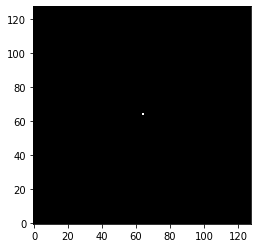

In [14]:
unresolved_source = np.zeros_like(image)
rho = np.sqrt(xx**2 + yy**2)
unresolved_source += ~(rho > 0)
plt.imshow(unresolved_source, cmap="gray")

(-111.66737456552767,
 122.29240359121272,
 -114.03630501181289,
 110.95035673749908)

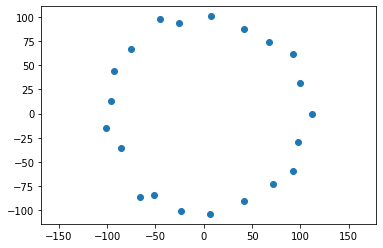

In [15]:
N = 21
circle_mask = np.zeros((N, 2))
for i in range(N):
    circle_mask[i,0] = (100 + 10*np.random.normal())*np.cos(2*np.pi*i/N)
    circle_mask[i,1] = (100 + 10*np.random.normal())*np.sin(2*np.pi*i/N)
plt.scatter(circle_mask[:, 0], circle_mask[:, 1])
plt.axis("equal")

In [16]:
random_mask = np.random.normal(size=(9, 2))
random_mask

array([[-0.17655161,  1.11527963],
       [-1.68361606, -0.66551066],
       [-0.1919013 ,  0.27112261],
       [ 0.23848081, -0.17337137],
       [ 1.1362533 ,  0.14899826],
       [ 0.6152811 , -0.56881844],
       [ 0.02237083,  1.04592632],
       [-0.17505814,  1.19849504],
       [-1.96342187, -1.19446712]])

In [17]:
kpi = xara.KPI(array=circle_mask, ndgt=8)
B = exo.Baselines(N, circle_mask) # simili KPI

Attempting to build KPI from array None
210 distinct baselines were identified
10 first singular values for this array:
[4.58257569 4.58257569 4.58257569 4.58257569 4.58257569 4.58257569
 4.58257569 4.58257569 4.58257569 4.58257569]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -  21 sub-apertures
        - 210 distinct baselines
        - 190 Ker-phases (90.5 % target phase information recovery)
        -  20 Eig-phases (95.2 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


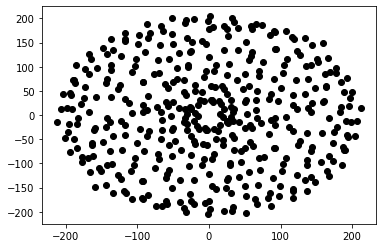

In [18]:
# uv plane
plt.scatter(kpi.UVC[:, 0], kpi.UVC[:, 1], c="k")
plt.scatter(-kpi.UVC[:, 0], -kpi.UVC[:, 1], c="k")

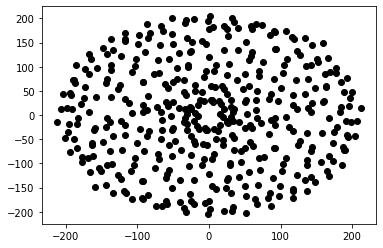

In [19]:
# uv plane
plt.scatter(B.UVC[:, 0], B.UVC[:, 1], c="k")
plt.scatter(-B.UVC[:, 0], -B.UVC[:, 1], c="k")

In [74]:
dft_matrix = xara.core.compute_DFTM1(kpi.UVC, m2pix, ISZ)
dft_matrix_i = xara.core.compute_DFTM1(kpi.UVC, m2pix, ISZ, inv=True)
dft_matrix2 = xara.core.compute_DFTM1(B.UVC, m2pix, ISZ)
dft_matrix2_i = xara.core.compute_DFTM1(B.UVC, m2pix, ISZ, inv=True)
dft_matrix2_i.shape

(16384, 210)

In [72]:
# There is an analytical solution for gamma in term of r only for circular star and limb darkening model
# For binary, the solution is in term of u (for point like star), in general the solution lies in the Fourier space gamma(u, v)
X = image2
flux = np.sum(X)
# X = unresolved_source
# introduce random phase error
gamma = np.dot(dft_matrix, np.ravel(X))
gamma2 = np.dot(dft_matrix2, np.ravel(X))

1245.0


In [59]:
dirty_image = np.dot(gamma2, dft_matrix2_i.T)

array([[1.31998564, 1.2175556 , 1.15213316, ..., 1.2267562 , 1.30880147,
        1.37471184],
       [1.18180534, 1.10921524, 1.0896164 , ..., 1.20768187, 1.25155309,
        1.24615308],
       [1.12948943, 1.06708568, 1.1007624 , ..., 1.1520953 , 1.15980919,
        1.09076424],
       ...,
       [0.75507187, 0.91905989, 1.01872987, ..., 1.34326883, 1.16156049,
        1.13310707],
       [0.93858508, 1.09076424, 1.15980919, ..., 1.26185002, 1.1007624 ,
        1.06708568],
       [1.15406467, 1.24615308, 1.25155309, ..., 1.18171037, 1.0896164 ,
        1.10921524]])

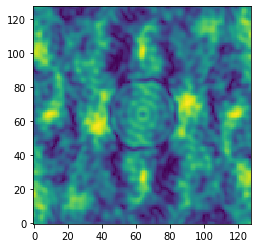

In [77]:
dirty_image = dirty_image.reshape((128, 128))
plt.imshow(np.absolute(dirty_image))
np.absolute(dirty_image)/flux

## Explore closure phase for binary and unresolved source: inspect error introduced in visibilities (do they cancel out like they should for given method to compute closure phase)

In [61]:
method1 = exo.phase_closure_operator(B, 0) # Labeyrie and litterature proposed method
#method2 = exo.eigenvector_phase_closure_operator(kpi) # my version of Ben code
method3 = exo.kpi(mask=B.VAC).uv_to_bsp # Ben code
method4 = exo.full_phase_closure_operator(B)

There are 190 independant closure phases
210 distinct baselines were identified
190 Kernel Phases identified.
Now calculating bispectrum
Calculating bispectrum matrix. Will take a few minutes.
Done 0 of 21 .  190  bispectra found. Time taken: 0.0 sec
Done. Total time taken: 0.0 mins
Found 1330 bispectra
Doing sparse svd
Matrix rank: 190
Reduced-rank bispectrum matrix calculated.
Matrix shape (190, 210)
Time taken: 0.0 mins
There are 1330 independant closure phases


In [62]:
# should be 0 for unresolved source
phases = np.angle(gamma2)
amp = np.abs(gamma2)
baseline = np.sqrt(B.UVC[:, 0]**2 + B.UVC[:, 1]**2)
phases

array([ 3.14159265e+00,  3.28826376e-16,  3.14159265e+00, -5.37457897e-16,
       -3.14159265e+00, -2.00345615e-16,  5.43639046e-15, -3.14159265e+00,
        3.14159265e+00,  3.14159265e+00,  3.14159265e+00,  3.14159265e+00,
        3.14159265e+00, -6.07594880e-18,  6.36665241e-18,  3.14159265e+00,
        1.43438934e-16,  1.48180563e-15,  2.30860760e-16,  3.14159265e+00,
       -1.03405368e-16,  3.14159265e+00, -4.60148772e-16,  6.26883648e-16,
       -3.14159265e+00,  3.14159265e+00,  1.98035025e-16, -3.14159265e+00,
       -3.14159265e+00, -3.14159265e+00, -3.14159265e+00,  3.14159265e+00,
        3.14159265e+00,  4.52493611e-16, -1.67346253e-15,  8.52135419e-15,
        3.14159265e+00, -3.14159265e+00, -9.65757599e-17, -1.29533364e-16,
        3.14159265e+00, -3.14159265e+00, -1.66599466e-17, -3.14159265e+00,
       -5.20954150e-17,  8.46064344e-16,  3.14159265e+00,  3.14159265e+00,
       -3.14159265e+00,  2.12964492e-15, -3.14159265e+00, -3.14159265e+00,
        3.14159265e+00, -

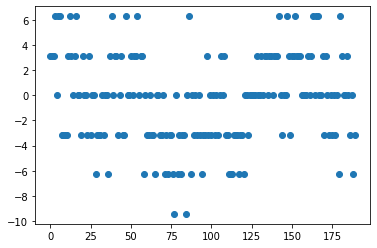

In [65]:
# noise in apertures
noise = np.random.random(size=kpi.nbap)
phase_noise = np.dot(B.BLM, noise)
noisy_phases = phases + phase_noise
closure_phases = np.dot(method1, noisy_phases)
plt.scatter(np.arange(closure_phases.size), closure_phases)

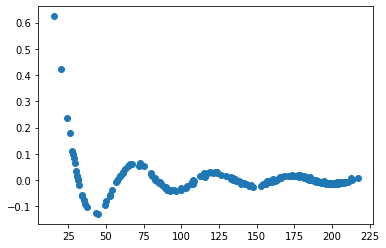

In [73]:
plt.scatter(baseline, np.real(gamma2)/flux)

In [ ]:
np.where(closure_phases == 0)[0].size